In [3]:
import sys
sys.path.append('/Users/felicity/Downloads/xta') # path to xta
import os, sys
from xta import xta_sim

In [4]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('petrstyle.txt')
from matplotlib.ticker import NullFormatter
import glob, h5py
import shutil
import scipy.io
import pandas as pd
import pydicom as dicom
#import cv2

from astra import Astra#, template_dir
from astra.plot import plot_fieldmaps, plot_stats, plot_stats_with_layout
import distgen
from distgen import Generator
from distgen.writers import *
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

#slice plots
# from h5py import File
# from pmd_beamphysics.interfaces import opal
# from pmd_beamphysics.plot import slice_plot
# from pmd_beamphysics.plot import marginal_plot, density_plot

# Generating electron distribution with tumor image

In [6]:
tumor1='/Users/felicity/Downloads/field1/field6.jpg'

## Electron Distribution Generation

In [8]:
def generate_dist(dist_file):

    # dist_file = '/Users/felicity/downloads/field1/field1.dcm'
    dist = Generator(dist_file, verbose=False)
    
    dist.input['xy_dist']['file'] = tumor1 #dcm_crop(dcm_path)
    dist.input['n_particle'] = int(1e4)
    dist.input['start']['MTE']['value'] = 130 #330
    
    
    fwhm = 0.06/2.355 # 60 fs = 0.06 ps
    dist.input['t_dist']['sigma_t']['value'] = fwhm
    
    dist.input['total_charge']['value'] = 1 
    #will change the amount of charge in the bunch
    
        # dist.input['r_dist']['max_r']['value'] = 0.5
        
    dist.run()
    particles = dist.particles 
    #particles.write_astra('xta/astra-inputs/astra_particles.txt')
    #particles.write_astra('xta/astra-inputs/field1.jpg')
    
    return particles, dist

In [9]:
dist_file = '/Users/felicity/downloads/xta/astra-inputs/distgen.yaml'

In [10]:
newtumorpdfs='/Users/felicity/downloads/newtumorpdfs/tumor6_5x5mm.pdf'

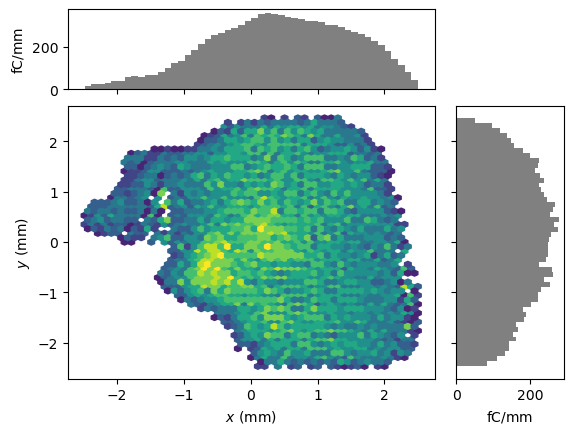

In [11]:
particles, dist = generate_dist(dist_file)
particles.plot('x','y')
plt.savefig(newtumorpdfs)

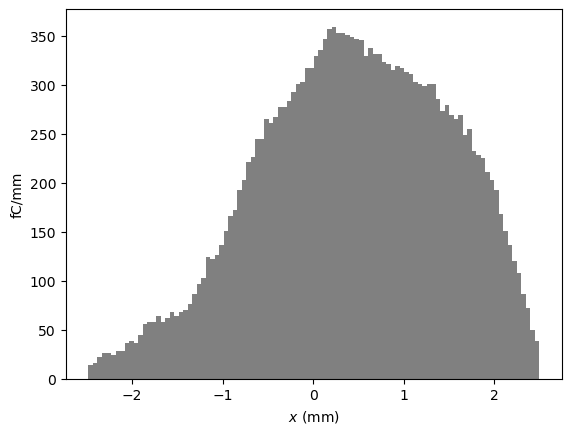

In [12]:
particles.plot('x')

In [13]:
particles.x

array([-0.00093771, -0.00050966, -0.00018056, ...,  0.00216455,
       -0.0011508 , -0.00062474])

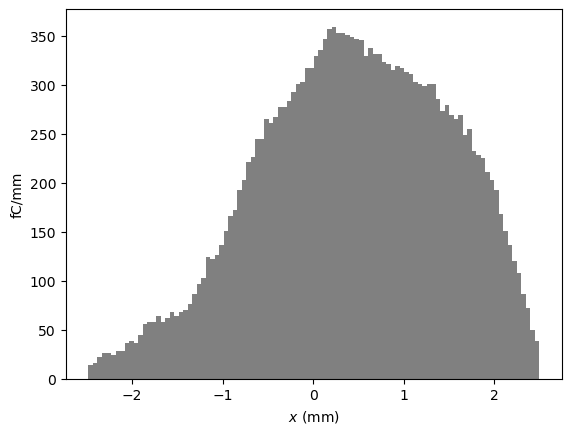

In [14]:
particles.plot()


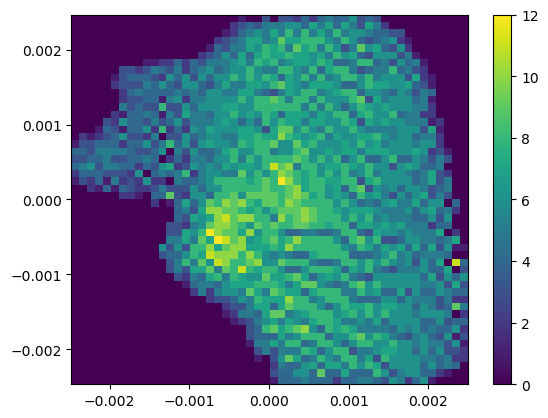

In [15]:
counts, xbins, ybins, image = plt.hist2d(particles.x, particles.y, bins=50)

plt.colorbar(image)
plt.show()


In [16]:
len(counts)

50

In [17]:
#from matplotlib import colormaps
#list(colormaps)

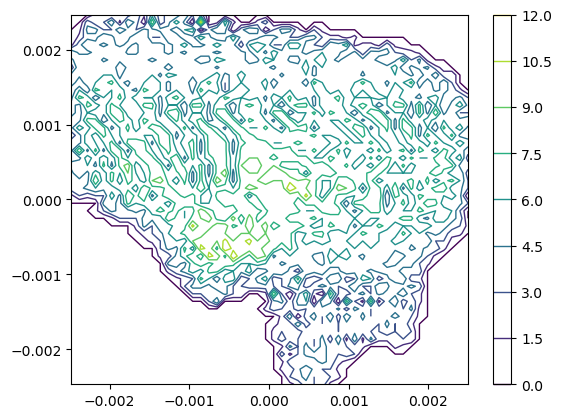

In [18]:
plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=1, cmap = plt.cm.viridis)
plt.colorbar()
plt.show()


In [19]:
tumorcontours='/Users/felicity/downloads/tumorcontours/tumor6contour.pdf'

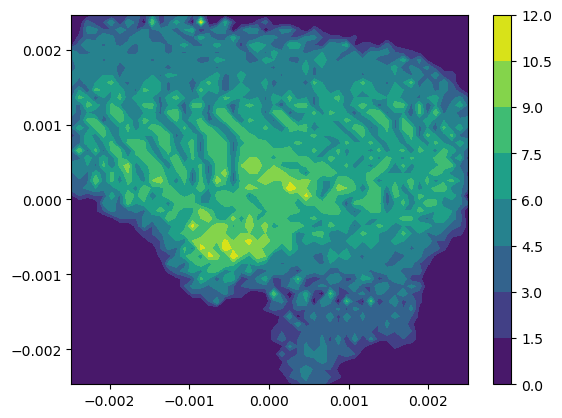

In [20]:
plt.contourf(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()], cmap = plt.cm.viridis)
plt.colorbar()
plt.savefig(tumorcontours)

In [100]:
len(counts)

50

In [21]:
print(xbins)

[-2.48342754e-03 -2.38377894e-03 -2.28413035e-03 -2.18448175e-03
 -2.08483315e-03 -1.98518455e-03 -1.88553596e-03 -1.78588736e-03
 -1.68623876e-03 -1.58659017e-03 -1.48694157e-03 -1.38729297e-03
 -1.28764437e-03 -1.18799578e-03 -1.08834718e-03 -9.88698583e-04
 -8.89049986e-04 -7.89401389e-04 -6.89752791e-04 -5.90104194e-04
 -4.90455597e-04 -3.90807000e-04 -2.91158403e-04 -1.91509806e-04
 -9.18612086e-05  7.78738851e-06  1.07435986e-04  2.07084583e-04
  3.06733180e-04  4.06381777e-04  5.06030374e-04  6.05678971e-04
  7.05327568e-04  8.04976166e-04  9.04624763e-04  1.00427336e-03
  1.10392196e-03  1.20357055e-03  1.30321915e-03  1.40286775e-03
  1.50251635e-03  1.60216494e-03  1.70181354e-03  1.80146214e-03
  1.90111073e-03  2.00075933e-03  2.10040793e-03  2.20005653e-03
  2.29970512e-03  2.39935372e-03  2.49900232e-03]


In [22]:
print()

In [23]:
print(ybins)

[-2.46823348e-03 -2.36951670e-03 -2.27079992e-03 -2.17208313e-03
 -2.07336635e-03 -1.97464956e-03 -1.87593278e-03 -1.77721600e-03
 -1.67849921e-03 -1.57978243e-03 -1.48106565e-03 -1.38234886e-03
 -1.28363208e-03 -1.18491530e-03 -1.08619851e-03 -9.87481728e-04
 -8.88764944e-04 -7.90048160e-04 -6.91331377e-04 -5.92614593e-04
 -4.93897809e-04 -3.95181026e-04 -2.96464242e-04 -1.97747458e-04
 -9.90306745e-05 -3.13890824e-07  9.84028929e-05  1.97119677e-04
  2.95836460e-04  3.94553244e-04  4.93270028e-04  5.91986811e-04
  6.90703595e-04  7.89420379e-04  8.88137162e-04  9.86853946e-04
  1.08557073e-03  1.18428751e-03  1.28300430e-03  1.38172108e-03
  1.48043786e-03  1.57915465e-03  1.67787143e-03  1.77658822e-03
  1.87530500e-03  1.97402178e-03  2.07273857e-03  2.17145535e-03
  2.27017213e-03  2.36888892e-03  2.46760570e-03]


In [24]:
counts[1]
sum(sum(counts[:]))

10000.0

In [25]:
counts[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 5., 3., 5., 3., 5., 4., 4.,
       3., 2., 2., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
counts, xedges, yedges, Image = plt.hist2d(particles.x, particles.y, bins=bins, norm=LogNorm(), range=[[0, 1], [0, 400]])

NameError: name 'bins' is not defined

In [27]:
sum(counts[5])

40.0

In [60]:
sum(counts[1])

24.0

In [98]:
electron_sum = 0
for index in range (0,50):
    electronsinbin=(counts[index]) 
    print(electronsinbin)
    sumofelectronsinbin=sum(electronsinbin)
    print(f'bucket{index + 1}: {sumofelectronsinbin}')
    electron_sum += sumofelectronsinbin
    addedelectronsinbins=(sumofelectronsinbin)
print(electron_sum)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 2. 4. 3. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket1: 15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 3. 4. 5. 3. 4. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket2: 24.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 4. 6. 4. 3. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket3: 25.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 4. 4. 3. 4. 5. 4. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket4: 28.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 4. 1. 3. 5. 5. 5. 4. 3. 4. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket5: 37.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 5. 3. 5. 3. 5. 4. 4. 3. 2. 2. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket

In [29]:
#write the equation to go from particles to dose 
dose=(sum(counts[5]) 0.6)/1000

In [31]:
dose

0.024

In [33]:
#make a loop to print the dose for every bucket.add a print statement. 

In [108]:
sum_dose = 0
for index in range(0,50):
    bucketcounts=counts[index]
    sumofbucketcounts=sum(counts[index])
    dosage=(sumofbucketcounts*0.6)/1000
    print(f'bucket {index+1}: {dosage}')
    sum_dose += dosage

bucket 1: 0.009
bucket 2: 0.014399999999999998
bucket 3: 0.015
bucket 4: 0.016800000000000002
bucket 5: 0.0222
bucket 6: 0.024
bucket 7: 0.034199999999999994
bucket 8: 0.0366
bucket 9: 0.036
bucket 10: 0.0396
bucket 11: 0.0414
bucket 12: 0.048600000000000004
bucket 13: 0.0594
bucket 14: 0.07379999999999999
bucket 15: 0.07859999999999999
bucket 16: 0.0948
bucket 17: 0.1092
bucket 18: 0.1266
bucket 19: 0.141
bucket 20: 0.1524
bucket 21: 0.1578
bucket 22: 0.1656
bucket 23: 0.1722
bucket 24: 0.18059999999999998
bucket 25: 0.1896
bucket 26: 0.1986
bucket 27: 0.21059999999999998
bucket 28: 0.213
bucket 29: 0.21059999999999998
bucket 30: 0.2082
bucket 31: 0.2016
bucket 32: 0.19979999999999998
bucket 33: 0.1956
bucket 34: 0.19019999999999998
bucket 35: 0.19019999999999998
bucket 36: 0.1866
bucket 37: 0.18059999999999998
bucket 38: 0.1794
bucket 39: 0.1752
bucket 40: 0.165
bucket 41: 0.1596
bucket 42: 0.1548
bucket 43: 0.14579999999999999
bucket 44: 0.1356
bucket 45: 0.12359999999999999
bucket 

In [110]:
sum_dose

5.999999999999999

GENERATED IMAGE FOR TUMOR 4 

In [ ]:
def generate_dist(dist_file):

    # dist_file = '/Users/felicity/downloads/field1/field1.dcm'
    dist = Generator(dist_file, verbose=False)
    
    dist.input['xy_dist']['file'] = tumor1 #dcm_crop(dcm_path)
    dist.input['n_particle'] = int(1e4)
    dist.input['start']['MTE']['value'] = 130 #330
    
    
    fwhm = 0.06/2.355 # 60 fs = 0.06 ps
    dist.input['t_dist']['sigma_t']['value'] = fwhm
    
    dist.input['total_charge']['value'] = 1 
    #will change the amount of charge in the bunch
    
        # dist.input['r_dist']['max_r']['value'] = 0.5
        
    dist.run()
    particles = dist.particles 
    #particles.write_astra('xta/astra-inputs/astra_particles.txt')
    #particles.write_astra('xta/astra-inputs/field1.jpg')
    
    return particles, dist

In [138]:
dist_file = '/Users/felicity/downloads/xta/astra-inputs/distgen.yaml'

In [140]:
newtumorpdfs='/Users/felicity/downloads/newtumorpdfs/tumor4_5x5mm.pdf'

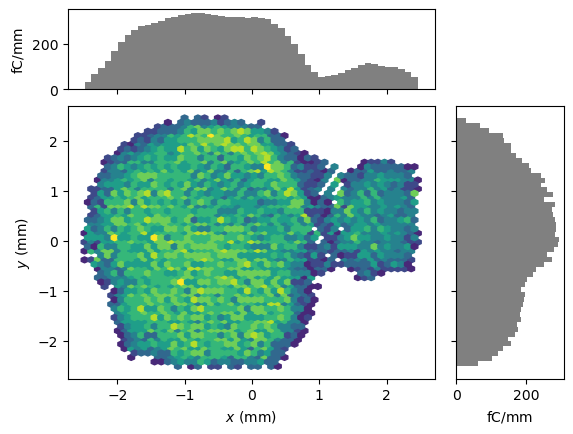

In [142]:
particles, dist = generate_dist(dist_file)
particles.plot('x','y')

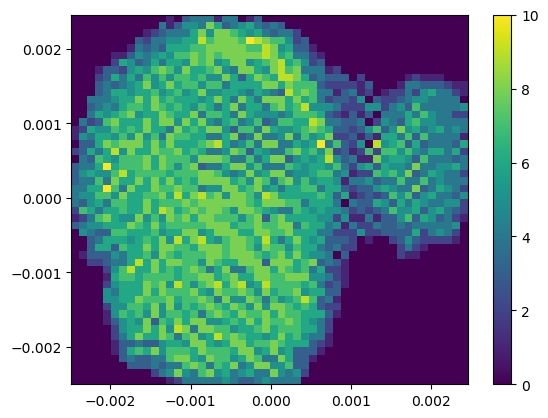

In [157]:
counts, xbins, ybins, image = plt.hist2d(particles.x, particles.y, bins=50)

plt.colorbar(image)
plt.show()


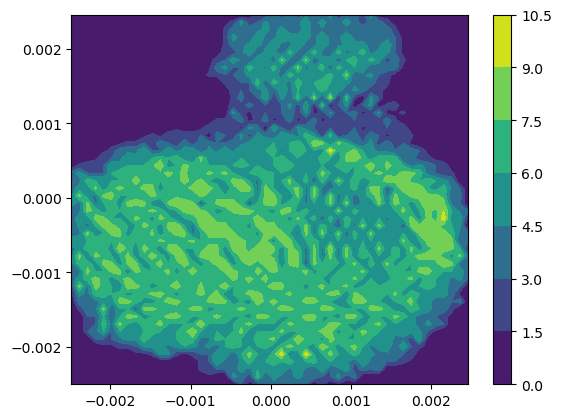

In [159]:
plt.contourf(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()], cmap = plt.cm.viridis)
plt.colorbar()


In [161]:
electron_sum = 0
for index in range (0,50):
    electronsinbin=(counts[index]) 
    print(electronsinbin)
    sumofelectronsinbin=sum(electronsinbin)
    print(f'bucket{index + 1}: {sumofelectronsinbin}')
    electron_sum += sumofelectronsinbin
    addedelectronsinbins=(sumofelectronsinbin)
print(electron_sum)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 1. 2.
 4. 4. 4. 3. 3. 3. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket1: 31.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 5. 4. 2. 7.
 3. 5. 4. 4. 5. 4. 4. 3. 3. 5. 2. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket2: 65.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 3. 3. 3. 4. 5. 4. 6.
 5. 5. 6. 4. 6. 4. 3. 6. 3. 4. 6. 2. 4. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
bucket3: 95.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 3. 6. 4. 3. 5. 7. 4.
 6. 7. 6. 7. 5. 6. 7. 4. 6. 6. 5. 3. 6. 4. 4. 3. 3. 2. 1. 0. 0. 0. 0. 0.
 0. 0.]
bucket4: 125.0
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  5.  5.  2.  1.  2.  3.  3.
  6.  6.  3.  6.  8.  6.  4.  7. 10.  4.  5. 10.  6.  6.  8.  6.  5.  7.
  5.  5.  4.  4.  4.  3.  3.  0.  0.  0.  0.  0.  0.  0.]
bucket5: 166.0
[0. 0. 0. 0. 1. 1. 2. 2. 3. 5. 5. 5. 4. 5. 6. 5. 4. 5. 3. 6. 7. 6. 6. 6.
 7. 5. 7. 8. 7. 6. 5. 9. 7. 5. 7. 8

SUM DOSAGE FOR TUMOR 4 

In [171]:
sum_dose = 0
for index in range(0,50):
    bucketcounts=counts[index]
    sumofbucketcounts=sum(counts[index])
    dosage=(sumofbucketcounts*0.6)/1000
    print(f'bucket {index+1}: {dosage}')
    sum_dose += dosage

bucket 1: 0.0186
bucket 2: 0.039
bucket 3: 0.057
bucket 4: 0.075
bucket 5: 0.0996
bucket 6: 0.1224
bucket 7: 0.141
bucket 8: 0.156
bucket 9: 0.16440000000000002
bucket 10: 0.16679999999999998
bucket 11: 0.174
bucket 12: 0.1788
bucket 13: 0.1866
bucket 14: 0.1896
bucket 15: 0.195
bucket 16: 0.1974
bucket 17: 0.1992
bucket 18: 0.1986
bucket 19: 0.19619999999999999
bucket 20: 0.19440000000000002
bucket 21: 0.19079999999999997
bucket 22: 0.1884
bucket 23: 0.189
bucket 24: 0.1896
bucket 25: 0.186
bucket 26: 0.1878
bucket 27: 0.1866
bucket 28: 0.1824
bucket 29: 0.1716
bucket 30: 0.159
bucket 31: 0.1386
bucket 32: 0.11939999999999999
bucket 33: 0.09179999999999999
bucket 34: 0.06420000000000001
bucket 35: 0.0444
bucket 36: 0.033
bucket 37: 0.0348
bucket 38: 0.0372
bucket 39: 0.0438
bucket 40: 0.0498
bucket 41: 0.057
bucket 42: 0.0624
bucket 43: 0.06839999999999999
bucket 44: 0.06659999999999999
bucket 45: 0.060599999999999994
bucket 46: 0.0594
bucket 47: 0.058199999999999995
bucket 48: 0.0521

In [167]:
 sum_dose

6.000000000000002